## Titanic survival

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import ensemble

## Load data
Task: predict survival of the Titanic sinking ('Survived' column)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Exploratory Analysis

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


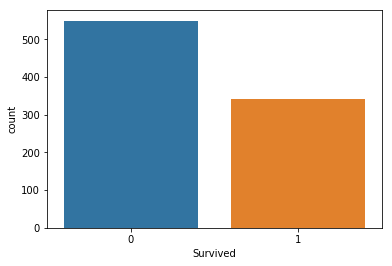

In [4]:
sns.countplot(train_data.Survived)

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
X_train = train_data.drop(['PassengerId'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis=1)

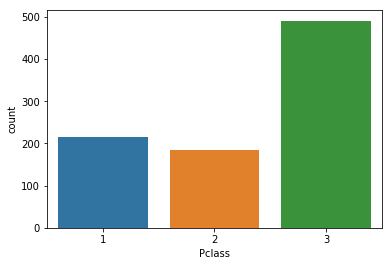

In [7]:
sns.countplot(X_train.Pclass.fillna(value='missing'))

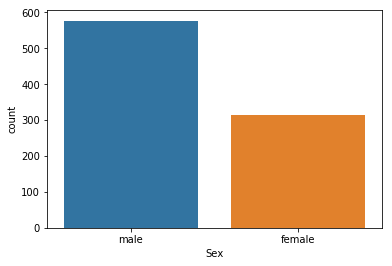

In [8]:
sns.countplot(X_train.Sex.fillna(value='missing'))

/home/diego/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 209.979)

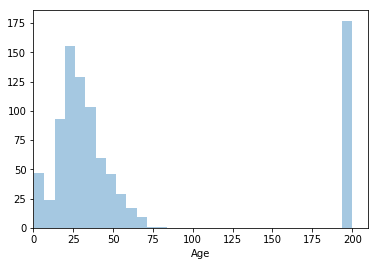

In [9]:
sns.distplot(X_train.Age.fillna(value=200), kde=False)
plt.xlim([0, None])

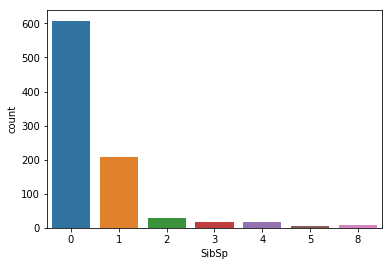

In [10]:
sns.countplot(X_train.SibSp.fillna(value='missing'))

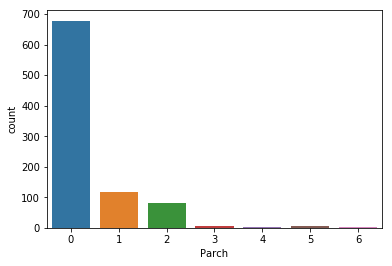

In [11]:
sns.countplot(X_train.Parch.fillna(value='missing'))

In [12]:
X_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

/home/diego/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 537.94566)

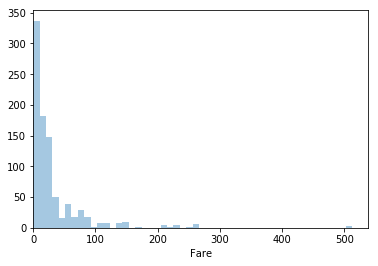

In [13]:
sns.distplot(X_train.Fare.fillna(value=600), kde=False)
plt.xlim([0, None])

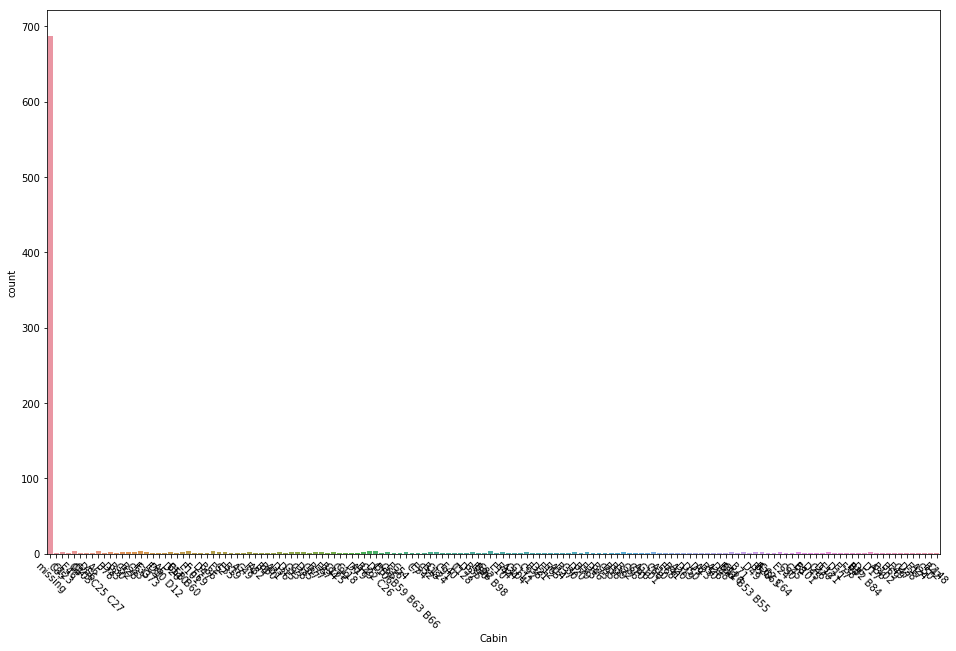

In [14]:
plt.figure(figsize=(16,10))
sns.countplot(X_train.Cabin.fillna(value='missing'))
_ = plt.xticks(rotation=-45)

In [15]:
X_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
X_train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

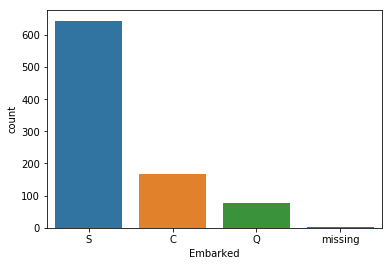

In [17]:
sns.countplot(X_train.Embarked.fillna(value='missing'))

In [18]:
# sns.heatmap(train_data)

## Data cleaning

In [19]:
# remove NaN: Age, Cabin, Embarked
X_train['AgeMissing'] = X_train.Age.isna()
X_train.Age.fillna(value=0, inplace=True)
X_train.Cabin.fillna(value='missing', inplace=True)
X_train.Embarked.fillna(value='missing', inplace=True)

X_test['AgeMissing'] = X_test.Age.isna()
X_test.Age.fillna(value=0, inplace=True)
X_test.Cabin.fillna(value='missing', inplace=True)
X_test.Embarked.fillna(value='missing', inplace=True)

In [20]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeMissing
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,False


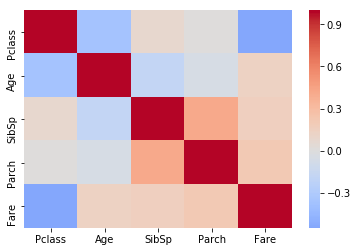

In [21]:
corr = X_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
# sns.heatmap(corr)
sns.heatmap(corr, center=0, cmap='coolwarm')

<Figure size 360x144 with 0 Axes>

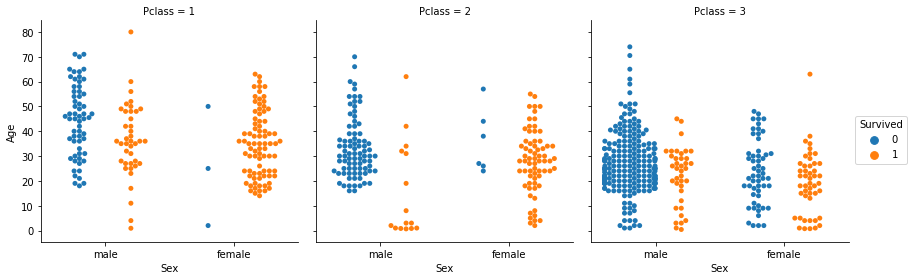

In [22]:
plt.figure(figsize=(5,2))
sns.factorplot(x='Sex', y='Age',
               hue='Survived', col='Pclass', data=train_data,
               kind='swarm', dodge=True)

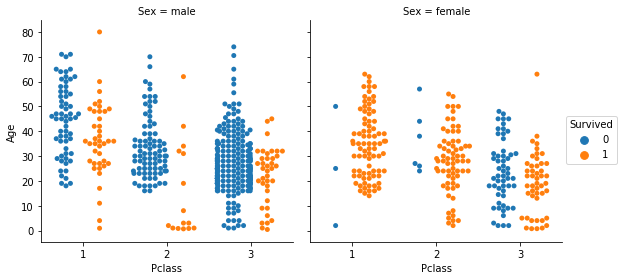

In [23]:
sns.factorplot(x='Pclass',
               y='Age',
               hue='Survived', col='Sex', data=train_data,
               kind='swarm', dodge=True)

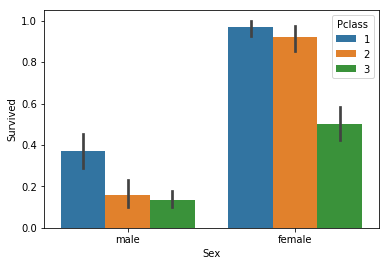

In [24]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

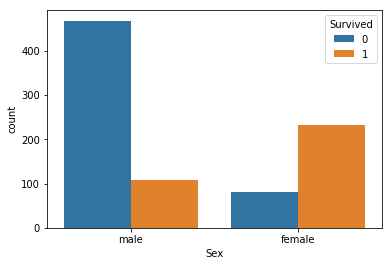

In [25]:
sns.countplot(x='Sex', hue='Survived', data=train_data)

<Figure size 360x144 with 0 Axes>

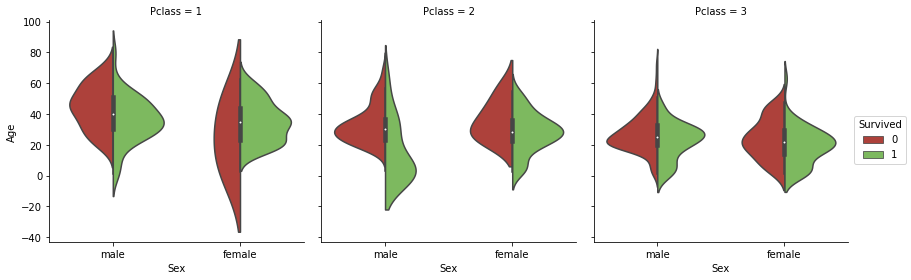

In [26]:
plt.figure(figsize=(5,2))
sns.factorplot(x='Sex', y='Age',
               hue='Survived', col='Pclass', data=train_data,
               kind='violin', split=True,
               palette=['#C03028', '#78C850'])

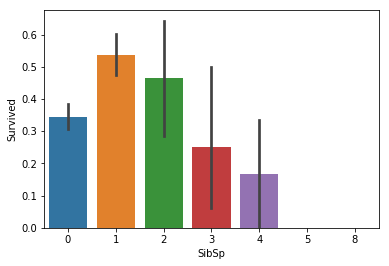

In [27]:
#SibSp, Parch
sns.barplot(x='SibSp', y='Survived', data=train_data)

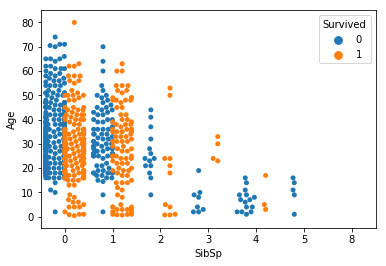

In [28]:
sns.swarmplot(x='SibSp', y='Age',
               hue='Survived', data=train_data, dodge=True)

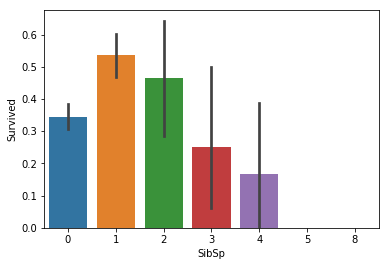

In [29]:
#SibSp, Parch
sns.barplot(x='SibSp', y='Survived', data=train_data)

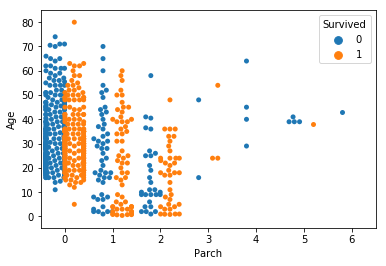

In [30]:
sns.swarmplot(x='Parch', y='Age',
               hue='Survived', data=train_data, dodge=True)

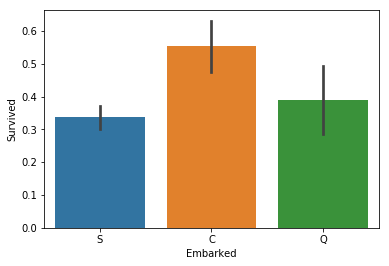

In [31]:
sns.barplot(x='Embarked', y='Survived', data=train_data, dodge=True)

## Feature Engineering

In [32]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeMissing
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,False


In [33]:
# X_train.drop(['Name', 'Ticket', ''], axis=1, inplace=True)
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeMissing
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,False


In [34]:
# replace name by its length
X_train['NameLength'] = X_train['Name'].str.len()
X_test['NameLength'] = X_test['Name'].str.len()

In [35]:
# replace ticket by its length
X_train['TicketLength'] = X_train['Ticket'].str.len()
X_test['TicketLength'] = X_test['Ticket'].str.len()

In [36]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeMissing,NameLength,TicketLength
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing,S,False,23,9
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,51,8
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,False,22,16
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,44,6
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing,S,False,24,6


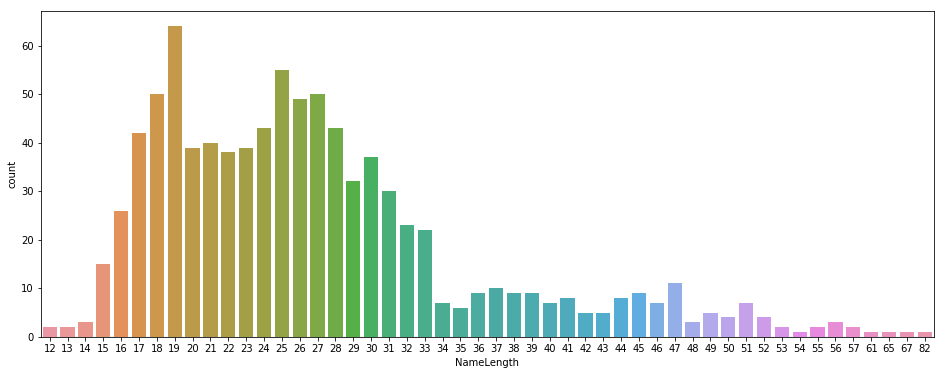

In [37]:
plt.figure(figsize=(16, 6))
sns.countplot('NameLength', data=X_train)

In [38]:
X_train['NameLength'] = pd.cut(X_train.NameLength, bins=[0,15,30,45,100], labels=False) # group in bins
X_test['NameLength'] = pd.cut(X_test.NameLength, bins=[0,15,30,45,100], labels=False) # group in bins

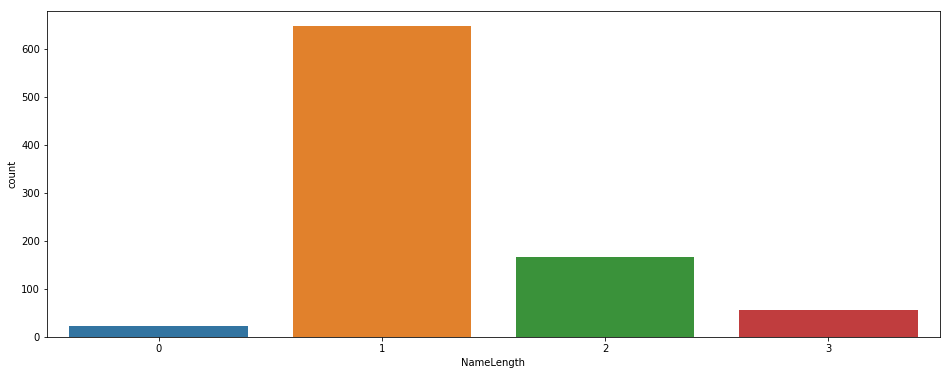

In [39]:
plt.figure(figsize=(16, 6))
sns.countplot('NameLength', data=X_train)

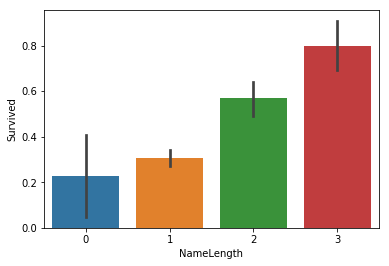

In [40]:
sns.barplot(x='NameLength', y='Survived', data=X_train)

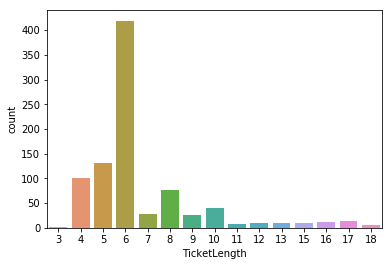

In [41]:
sns.countplot('TicketLength', data=X_train)

In [42]:
X_train['TicketLength'] = pd.cut(X_train.TicketLength, bins=[0,5,7,20], labels=False) 
X_test['TicketLength'] = pd.cut(X_test.TicketLength, bins=[0,5,7,20], labels=False) 

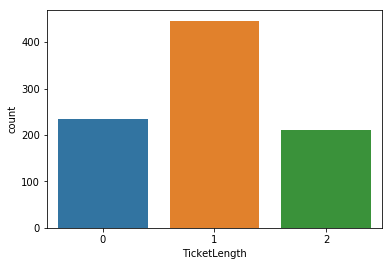

In [43]:
sns.countplot('TicketLength', data=X_train)

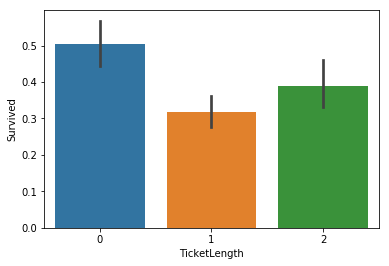

In [44]:
sns.barplot(x='TicketLength', y='Survived', data=X_train)

In [45]:
# simplify cabin feature to boolean
X_train['Cabin'] = X_train['Cabin'] != 'missing'
X_test['Cabin'] = X_test['Cabin'] != 'missing'

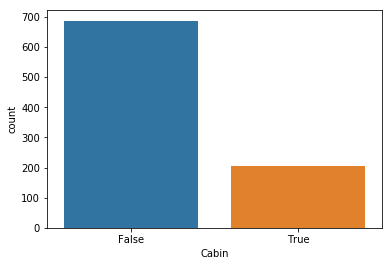

In [46]:
sns.countplot('Cabin', data=X_train)

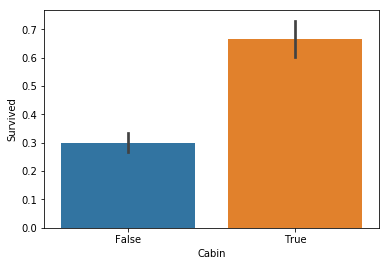

In [47]:
sns.barplot(x='Cabin', y='Survived', data=X_train)

In [48]:
X_train.drop(['Name', 'Ticket', 'Survived'], axis=1, inplace=True)
X_test.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [49]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeMissing,NameLength,TicketLength
0,3,male,22.0,1,0,7.2500,False,S,False,1,2
1,1,female,38.0,1,0,71.2833,True,C,False,3,2
2,3,female,26.0,0,0,7.9250,False,S,False,1,2
3,1,female,35.0,1,0,53.1000,True,S,False,2,1
4,3,male,35.0,0,0,8.0500,False,S,False,1,1


In [50]:
X_train = pd.concat([X_train, pd.get_dummies(X_train.Embarked)], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test.Embarked)], axis=1)

In [51]:
X_train.drop(['Embarked'], axis=1, inplace=True)
X_test.drop(['Embarked'], axis=1, inplace=True)

In [52]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,AgeMissing,NameLength,TicketLength,C,Q,S,missing
0,3,male,22.0,1,0,7.2500,False,False,1,2,0,0,1,0
1,1,female,38.0,1,0,71.2833,True,False,3,2,1,0,0,0
2,3,female,26.0,0,0,7.9250,False,False,1,2,0,0,1,0
3,1,female,35.0,1,0,53.1000,True,False,2,1,0,0,1,0
4,3,male,35.0,0,0,8.0500,False,False,1,1,0,0,1,0


In [53]:
X_train['male'] = X_train['Sex'] == 'male'
X_test['male'] = X_test['Sex'] == 'male'

In [54]:
X_train.drop(['Sex'], axis=1, inplace=True)
X_test.drop(['Sex'], axis=1, inplace=True)

## Algorithm selection

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [79]:
hyperparameters = dict(criterion=['gini','entropy'],
                       max_features=['auto', 'sqrt', 'log2'],
                       max_depth=[None, 3, 5, 10],
                  )

In [80]:
pipe = ensemble.RandomForestClassifier(n_estimators=100)
clf = GridSearchCV(estimator=pipe,param_grid=hyperparameters,cv=10)

In [81]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
clf.best_score_

0.8159371492704826

In [77]:
# clf.best_estimator_.score_

AttributeError: 'RandomForestClassifier' object has no attribute 'score_'

In [59]:
print(clf.best_params_)

{'max_depth': 5, 'max_features': 'log2'}


In [60]:
print(clf.refit) 

True


In [61]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,AgeMissing,NameLength,TicketLength,C,Q,S,missing,male
0,3,22.0,1,0,7.2500,False,False,1,2,0,0,1,0,True
1,1,38.0,1,0,71.2833,True,False,3,2,1,0,0,0,False
2,3,26.0,0,0,7.9250,False,False,1,2,0,0,1,0,False
3,1,35.0,1,0,53.1000,True,False,2,1,0,0,1,0,False
4,3,35.0,0,0,8.0500,False,False,1,1,0,0,1,0,True


In [62]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,AgeMissing,NameLength,TicketLength,C,Q,S,male
0,3,34.5,0,0,7.8292,False,False,1,1,0,1,0,True
1,3,47.0,1,0,7.0000,False,False,2,1,0,0,1,False
2,2,62.0,0,0,9.6875,False,False,1,1,0,1,0,True
3,3,27.0,0,0,8.6625,False,False,1,1,0,0,1,True
4,3,22.0,1,1,12.2875,False,False,2,1,0,0,1,False


In [67]:
X_test.Fare.fillna(value=0, inplace=True)

In [70]:
X_test['missing'] = 0

In [83]:
y_test_pred = clf.predict(X_test)

In [92]:
y_test_pred[:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [95]:
predictions = pd.concat([test_data['PassengerId'],
                         pd.DataFrame({'Survived':y_test_pred})],
                         axis=1)

In [96]:
predictions.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0


In [97]:
predictions.to_csv('titanic_predictions.csv', index=False)